In [ ]:
# Cell 1: Install MNE-Python and other necessary libraries
# This will install mne, numpy, pandas, scikit-learn, and tensorflow
!pip install mne numpy pandas scikit-learn tensorflow

print("Libraries installation initiated. Please wait for it to complete.")
print("You might see warnings about specific versions or dependencies; this is usually fine.")

Libraries installation initiated. Please wait for it to complete.
You might see warnings about specific versions or dependencies; this is usually fine.


In [ ]:
# Cell 0: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
print("Google Drive mounted successfully!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive mounted successfully!


In [ ]:
# Cell 2: Define Global Variables and EEG_FILES Dictionary (FINAL CHANNEL CORRECTION)

# ====================== DATASET PARAMETERS ======================
SFREQ = 512         # Target sampling frequency in Hz, as stated in annotation
N_EEG_CHANNELS = 34 # **CRITICAL UPDATE:** Number of expected EEG channels after dropping EKG

# ====================== SEGMENTATION PARAMETERS ======================
PREICTAL_DURATION_MIN = 30 # Duration of preictal segment in minutes (e.g., 30 mins before seizure onset)
INTERICTAL_DURATION_MIN = 60 # Duration of interictal segment in minutes (e.g., 60 mins before preictal starts)
SEGMENT_LENGTH_SEC = 5 # Length of each EEG segment in seconds

# ====================== PREPROCESSING PARAMETERS ======================
HIGH_PASS_FREQ = 0.5 # High-pass filter frequency in Hz (e.g., to remove drift)
LOW_PASS_FREQ = 30   # Low-pass filter frequency in Hz (e.g., to remove high-frequency noise/muscle artifacts)

# ====================== EXPECTED EEG CHANNELS (CRITICAL: BASED ON YOUR LATEST INSPECTION) ======================
# This list specifies the 34 channels we want to extract, IN THEIR EXACT NAMES from your EDF files,
# after 'EKG EKG' has been dropped.
EXPECTED_EEG_CHANNELS = [
    'EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 'EEG T3', 'EEG T5',
    'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 'EEG F9', 'EEG Fz', 'EEG Cz', 'EEG Pz',
    'EEG Fp2', 'EEG F4', 'EEG C4', 'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6',
    'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6', 'EEG F10',
    'SPO2', 'HR', '1', '2', 'MK'
]

# ====================== EEG_FILES DICTIONARY (CRITICAL!) ======================
# This dictionary maps patient IDs to lists of their EDF filenames.
# You MUST populate this accurately for all your patients.
EEG_FILES = {
    'PN00': ['PN00-1.edf', 'PN00-2.edf', 'PN00-3.edf', 'PN00-4.edf', 'PN00-5.edf'],
    # ADD OTHER PATIENTS AND THEIR EDF FILES HERE IF YOU HAVE THEM:
    # 'PN01': ['PN01-1.edf', 'PN01-2.edf', 'PN01-3.edf'],
    # 'PN02': ['PN02-1.edf', 'PN02-2.edf'],
    # ... and so on for all your patients (e.g., 'PN05': ['PN05-1.edf'])
}

print("Global variables and EEG_FILES dictionary defined!")

Global variables and EEG_FILES dictionary defined!


In [ ]:
import mne
import os

# Define the path to one of your EDF files
sample_edf_path = '/content/drive/MyDrive/EEG_Siena_Seizure_Data/edf_files/PN00-1.edf'

# Load the raw data (only header info is needed to get channel names)
raw_test = mne.io.read_raw_edf(sample_edf_path, preload=False, verbose='WARNING')

print("Actual channel names in PN00-1.edf (before dropping EKG):")
print(raw_test.ch_names)

# If you want to see them AFTER EKG is dropped (like your current code does)
ekg_channels = [ch for ch in raw_test.ch_names if 'EKG' in ch.upper()]
if ekg_channels:
    raw_test.drop_channels(ekg_channels)
print("\nActual channel names AFTER EKG drop:")
print(raw_test.ch_names)
print(f"Count: {len(raw_test.ch_names)}")

Actual channel names in PN00-1.edf (before dropping EKG):
['EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 'EEG T3', 'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 'EEG F9', 'EEG Fz', 'EEG Cz', 'EEG Pz', 'EEG Fp2', 'EEG F4', 'EEG C4', 'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6', 'EEG F10', 'EKG EKG', 'SPO2', 'HR', '1', '2', 'MK']

Actual channel names AFTER EKG drop:
['EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 'EEG T3', 'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 'EEG F9', 'EEG Fz', 'EEG Cz', 'EEG Pz', 'EEG Fp2', 'EEG F4', 'EEG C4', 'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6', 'EEG F10', 'SPO2', 'HR', '1', '2', 'MK']
Count: 34


/tmp/ipython-input-4-4019954270.py:8: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_test = mne.io.read_raw_edf(sample_edf_path, preload=False, verbose='WARNING')
/tmp/ipython-input-4-4019954270.py:8: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw_test = mne.io.read_raw_edf(sample_edf_path, preload=False, verbose='WARNING')
/tmp/ipython-input-4-4019954270.py:8: RuntimeWarning: Highpass cutoff frequency 15.91549 is greater than lowpass cutoff frequency 15.0, setting values to 0 and Nyquist.
  raw_test = mne.io.read_raw_edf(sample_edf_path, preload=False, verbose='WARNING')


In [ ]:
# Cell 3: Define parse_siena_annotations function (IMPROVED for robustness)

import re
import datetime

def parse_siena_annotations(annotation_filepath, target_edf_filename):
    """
    Parses the Siena annotations file to extract seizure start/end times
    for a specific EDF file, accounting for potential whitespace.

    Args:
        annotation_filepath (str): Path to the Seizures-list-PNXX.txt file.
        target_edf_filename (str): The specific EDF filename (e.g., 'PN00-1.edf')
                                   for which to find annotations.

    Returns:
        list: A list of tuples, where each tuple is (seizure_start_sec, seizure_end_sec)
              relative to the start of the EDF recording.
              Returns an empty list if no annotations are found for the target EDF.
    """
    seizure_annotations = []
    found_target_file = False
    registration_start_time_str = None # To store the registration start time for relative calculation

    try:
        with open(annotation_filepath, 'r') as f:
            content = f.read() # Read the entire content

        # Split the content into sections based on "File name:"
        # Use re.split to keep the delimiter (File name: ...)
        sections = re.split(r'(File name: .+?\.edf)', content, flags=re.IGNORECASE)

        # The first element of sections will be anything before the first "File name:",
        # so we start from index 1 and process in pairs (delimiter, content)
        for i in range(1, len(sections), 2):
            file_name_line = sections[i].strip() # Get the 'File name: PNXX-Y.edf' line
            section_content = sections[i+1] # Get the content for this file

            # Extract the actual EDF filename from the line
            match_filename = re.search(r'File name:\s*(\S+\.edf)', file_name_line, re.IGNORECASE)
            if match_filename:
                current_file_in_annotation = match_filename.group(1) # This is the filename from the annotation

                # Use .lower() and .strip() for robust comparison
                if current_file_in_annotation.lower().strip() == target_edf_filename.lower().strip():
                    found_target_file = True

                    # Extract Registration start time for this section
                    reg_start_match = re.search(r'Registration start time:\s*(\d{2}\.\d{2}\.\d{2})', section_content)
                    if reg_start_match:
                        registration_start_time_str = reg_start_match.group(1)
                        # Convert registration start time to a datetime object for calculation
                        reg_start_dt = datetime.datetime.strptime(registration_start_time_str, '%H.%M.%S')
                    else:
                        print(f"Warning: Registration start time not found for {target_edf_filename} in annotation file.")
                        found_target_file = False # Cannot process if registration start time is missing
                        continue # Skip this section if reg start time is crucial

                    # Find all seizure events within this section
                    seizure_matches = re.findall(
                        r'Seizure start time:\s*(\d{2}\.\d{2}\.\d{2})\s*Seizure end time:\s*(\d{2}\.\d{2}\.\d{2})',
                        section_content
                    )

                    for seizure_start_str, seizure_end_str in seizure_matches:
                        try:
                            seizure_start_dt = datetime.datetime.strptime(seizure_start_str, '%H.%M.%S')
                            seizure_end_dt = datetime.datetime.strptime(seizure_end_str, '%H.%M.%S')

                            # Calculate relative times in seconds from midnight for simplicity
                            # We assume times loop around midnight if necessary, which is typical for 24hr recordings
                            start_seconds_from_midnight = (seizure_start_dt - datetime.datetime.min).total_seconds()
                            end_seconds_from_midnight = (seizure_end_dt - datetime.datetime.min).total_seconds()
                            reg_start_seconds_from_midnight = (reg_start_dt - datetime.datetime.min).total_seconds()

                            # Calculate seizure times relative to the registration start time of the *recording*
                            seizure_start_sec_relative = start_seconds_from_midnight - reg_start_seconds_from_midnight
                            seizure_end_sec_relative = end_seconds_from_midnight - reg_start_seconds_from_midnight

                            # Handle cases where seizure time crosses midnight
                            if seizure_start_sec_relative < 0:
                                seizure_start_sec_relative += 24 * 3600
                            if seizure_end_sec_relative < 0:
                                seizure_end_sec_relative += 24 * 3600
                            if seizure_end_sec_relative < seizure_start_sec_relative: # if seizure ends on next day
                                seizure_end_sec_relative += 24 * 3600

                            seizure_annotations.append((seizure_start_sec_relative, seizure_end_sec_relative))
                        except ValueError as e:
                            print(f"Error parsing seizure time for {current_file_in_annotation}: {e}. Skipping this seizure entry.")
                    # Stop processing after finding the target file's annotations
                    break

        if not found_target_file:
            # This warning is now correctly handled by the main loop.
            # print(f"Debug: Target file {target_edf_filename} not found in annotation file {annotation_filepath}.")
            pass # The main loop handles "No specific seizure annotations found"

    except FileNotFoundError:
        print(f"Error: Annotation file not found at {annotation_filepath}")
    except Exception as e:
        print(f"An unexpected error occurred while parsing {annotation_filepath}: {e}")

    return seizure_annotations

In [ ]:
# Cell 4: Data Collection and Preprocessing Pipeline (Main Loop - FINAL Update for paths and Interictal)

# Import necessary modules
import os
import numpy as np
import mne
import re
import datetime

# Initialize lists to store all segmented data and their labels
all_segmented_data = []
all_labels = []

# ====================== PATH CONFIGURATION (CRITICAL!) ======================
BASE_DATA_PATH = '/content/drive/MyDrive/EEG_Siena_Seizure_Data/edf_files/'
ANNOTATION_BASE_PATH = '/content/drive/MyDrive/EEG_Siena_Seizure_Data/textfile/'

# ====================== INITIAL PATH VERIFICATION ======================
print("=== Initial Path Verification ===")
test_edf_filename = "PN00-1.edf"
test_edf_filepath = os.path.join(BASE_DATA_PATH, test_edf_filename)
print(f"Checking EDF file directly in BASE_DATA_PATH: {test_edf_filepath}")
print(f"Exists: {os.path.exists(test_edf_filepath)}")
if os.path.exists(test_edf_filepath):
    print(f"Sample EDF files in '{BASE_DATA_PATH}' folder: {os.listdir(BASE_DATA_PATH)[:3]}")
test_patient_id_for_annotation = "PN00"
test_annotation_file_path = os.path.join(ANNOTATION_BASE_PATH, f'Seizures-list-{test_patient_id_for_annotation}.txt')
print(f"\nChecking Annotation file: {test_annotation_file_path}")
print(f"Exists: {os.path.exists(test_annotation_file_path)}")
print("==================================\n")

# ====================== MAIN PROCESSING LOOP ======================
for patient_id, edf_files_for_patient in EEG_FILES.items():
    annotation_filename = f'Seizures-list-{patient_id}.txt'
    annotation_filepath = os.path.join(ANNOTATION_BASE_PATH, annotation_filename)

    if not os.path.exists(annotation_filepath):
        print(f"⚠️ Skipping patient {patient_id}: Annotation file not found at {annotation_filepath}. Cannot process EDFs for this patient.")
        continue

    for edf_filename in edf_files_for_patient:
        edf_filepath = os.path.join(BASE_DATA_PATH, edf_filename)

        if not os.path.exists(edf_filepath):
            print(f"⚠️ Skipping {edf_filename}: EDF file not found at {edf_filepath}. Please verify your `EEG_FILES` list in Cell 2 and the actual contents of `{BASE_DATA_PATH}`.")
            continue

        print(f"\n🔍 Processing Patient {patient_id}, EDF: {edf_filename}...")

        try:
            raw = mne.io.read_raw_edf(edf_filepath, preload=True, verbose='WARNING')

            if raw.info['sfreq'] != SFREQ:
                print(f"⚠️ Resampling from {raw.info['sfreq']} Hz to {SFREQ} Hz for {edf_filename}.")
                raw.resample(sfreq=SFREQ, verbose='WARNING')

            ekg_channels_found = [ch for ch in raw.ch_names if 'EKG' in ch.upper()]
            if ekg_channels_found:
                raw.drop_channels(ekg_channels_found)
                print(f"🗑️ Dropped EKG channels: {ekg_channels_found} from {edf_filename}.")

            available_eeg_channels_in_raw = [ch for ch in EXPECTED_EEG_CHANNELS if ch in raw.ch_names]
            raw.pick_channels(available_eeg_channels_in_raw)
            raw.set_channel_types({ch: 'eeg' for ch in raw.ch_names})

            print(f"📊 Selected {len(raw.ch_names)} EEG channels (out of {N_EEG_CHANNELS} expected) for {edf_filename}.")
            if len(raw.ch_names) != N_EEG_CHANNELS:
                print(f"Warning: Channel count mismatch in {edf_filename}. Expected {N_EEG_CHANNELS}, found {len(raw.ch_names)}. This might affect consistent tensor shapes.")

            raw.filter(l_freq=HIGH_PASS_FREQ, h_freq=LOW_PASS_FREQ, fir_design='firwin', verbose='WARNING')
            print(f"⚡ Applied {HIGH_PASS_FREQ}-{LOW_PASS_FREQ} Hz bandpass filter to {edf_filename}.")

            seizure_annotations_for_this_edf = parse_siena_annotations(annotation_filepath, edf_filename)

            if not seizure_annotations_for_this_edf:
                print(f"⚠️ No specific seizure annotations found for {edf_filename} within {annotation_filename}. Skipping segmentation for this EDF.")
                continue

            current_file_segments = []
            current_file_labels = []

            # Initialize a list to store all "bad" time intervals (seizure and preictal)
            # This helps avoid overlap when sampling interictal segments
            bad_intervals = []

            for seizure_start_sec_relative, seizure_end_sec_relative in seizure_annotations_for_this_edf:
                # --- Preictal (Label 1) ---
                preictal_end_sec = seizure_start_sec_relative
                preictal_start_sec = max(preictal_end_sec - (PREICTAL_DURATION_MIN * 60), 0)

                # Add preictal interval to bad_intervals
                bad_intervals.append((preictal_start_sec, preictal_end_sec))

                # Add seizure interval to bad_intervals
                bad_intervals.append((seizure_start_sec_relative, seizure_end_sec_relative))

                if preictal_end_sec > preictal_start_sec:
                    for t_start in np.arange(preictal_start_sec, preictal_end_sec, SEGMENT_LENGTH_SEC):
                        t_end = t_start + SEGMENT_LENGTH_SEC
                        if t_end <= preictal_end_sec:
                            start_idx = int(t_start * SFREQ)
                            end_idx = int(t_end * SFREQ)
                            if end_idx <= len(raw.times):
                                segment = raw.get_data(picks=raw.ch_names, start=start_idx, stop=end_idx)
                                expected_timepoints = int(SEGMENT_LENGTH_SEC * SFREQ)
                                if segment.shape[1] == expected_timepoints:
                                    current_file_segments.append(segment)
                                    current_file_labels.append(1)
                                else:
                                    print(f"Warning: Preictal segment for {edf_filename} at {t_start:.2f}s has incorrect length ({segment.shape[1]} vs {expected_timepoints} samples). Skipping.")
                            else:
                                print(f"Warning: Preictal segment for {edf_filename} at {t_start:.2f}s goes beyond recording end ({end_idx} samples vs {len(raw.times)} total). Skipping.")
                else:
                    print(f"Info: No valid preictal window for {edf_filename} (seizure at {seizure_start_sec_relative:.2f}s, start {preictal_start_sec:.2f}s, end {preictal_end_sec:.2f}s).")

            # --- Interictal (Label 0) ---
            # Sort bad_intervals and merge overlapping ones to create non-overlapping "no-go" zones
            bad_intervals.sort()
            merged_bad_intervals = []
            if bad_intervals:
                current_start, current_end = bad_intervals[0]
                for next_start, next_end in bad_intervals[1:]:
                    if next_start <= current_end: # Overlap
                        current_end = max(current_end, next_end)
                    else: # No overlap
                        merged_bad_intervals.append((current_start, current_end))
                        current_start, current_end = next_start, next_end
                merged_bad_intervals.append((current_start, current_end)) # Add the last merged interval

            # Iterate through the entire recording to find interictal segments
            # Aim to collect up to INTERICTAL_DURATION_MIN * 60 seconds of interictal data
            interictal_segments_collected_duration = 0

            for t_start in np.arange(0, raw.times[-1] - SEGMENT_LENGTH_SEC, SEGMENT_LENGTH_SEC):
                t_end = t_start + SEGMENT_LENGTH_SEC

                # Check if this segment overlaps with any merged_bad_interval
                is_overlapping = False
                for bad_start, bad_end in merged_bad_intervals:
                    # Check for overlap: (start1 < end2) and (end1 > start2)
                    if (t_start < bad_end) and (t_end > bad_start):
                        is_overlapping = True
                        break

                if not is_overlapping:
                    # If not overlapping and we still need interictal data
                    if interictal_segments_collected_duration < (INTERICTAL_DURATION_MIN * 60):
                        start_idx = int(t_start * SFREQ)
                        end_idx = int(t_end * SFREQ)
                        if end_idx <= len(raw.times):
                            segment = raw.get_data(picks=raw.ch_names, start=start_idx, stop=end_idx)
                            expected_timepoints = int(SEGMENT_LENGTH_SEC * SFREQ)
                            if segment.shape[1] == expected_timepoints:
                                current_file_segments.append(segment)
                                current_file_labels.append(0)
                                interictal_segments_collected_duration += SEGMENT_LENGTH_SEC
                            # else: Warning already covered by general segment check
                        # else: Warning already covered by general segment check
                    else:
                        # Stop collecting interictal if we have enough
                        break

            # Print specific info for interictal collection
            if np.sum(current_file_labels == 0) > 0:
                print(f"Info: Successfully extracted {np.sum(current_file_labels == 0)} interictal segments from {edf_filename}.")
            else:
                print(f"Info: Could not extract interictal segments for {edf_filename}. All available time might be marked as preictal/seizure, or recording is too short.")

            print(f"✅ Extracted {len(current_file_segments)} segments from {edf_filename} ({np.sum(current_file_labels)} preictal, {len(current_file_labels)-np.sum(current_file_labels)} interictal).")

            all_segmented_data.extend(current_file_segments)
            all_labels.extend(current_file_labels)

        except Exception as e:
            print(f"❌ Error processing {edf_filename}: {str(e)}. Skipping this EDF file.")
            continue

# ====================== FINAL DATASET CONSOLIDATION ======================
if all_segmented_data:
    X = np.array(all_segmented_data)
    y = np.array(all_labels)

    print("\n🎉 Data Preprocessing Complete! Final Dataset Summary:")
    print(f"Total segments extracted across all processed files: {X.shape[0]}")
    print(f"Shape of X (segments, channels, timepoints): {X.shape}")
    print(f"Shape of y (labels): {y.shape}")
    print(f"Number of Preictal segments (label 1): {np.sum(y == 1)}")
    print(f"Number of Interictal segments (label 0): {np.sum(y == 0)}")
else:
    print("\n❌ No segments were extracted from any file. Please review:")
    print("1. Ensure all cells (0-3) ran successfully without errors (especially `!pip install mne`).")
    print("2. Confirm that the `EEG_FILES` dictionary in Cell 2 accurately lists *all* your EDF filenames, and that they are indeed directly in the `edf_files` folder.")
    print(f"3. Confirm annotation files are at: `{ANNOTATION_BASE_PATH}Seizures-list-PNXX.txt`")
    print("4. Check if EDF files are not corrupted and contain the expected EEG channels.")
    X, y = np.array([]), np.array([])

=== Initial Path Verification ===
Checking EDF file directly in BASE_DATA_PATH: /content/drive/MyDrive/EEG_Siena_Seizure_Data/edf_files/PN00-1.edf
Exists: True
Sample EDF files in '/content/drive/MyDrive/EEG_Siena_Seizure_Data/edf_files/' folder: ['PN00-5.edf', 'PN00-4.edf', 'PN00-3.edf']

Checking Annotation file: /content/drive/MyDrive/EEG_Siena_Seizure_Data/textfile/Seizures-list-PN00.txt
Exists: True


🔍 Processing Patient PN00, EDF: PN00-1.edf...


/tmp/ipython-input-8-2844998256.py:51: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_filepath, preload=True, verbose='WARNING')
/tmp/ipython-input-8-2844998256.py:51: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_filepath, preload=True, verbose='WARNING')
/tmp/ipython-input-8-2844998256.py:51: RuntimeWarning: Highpass cutoff frequency 15.91549 is greater than lowpass cutoff frequency 15.0, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_filepath, preload=True, verbose='WARNING')


🗑️ Dropped EKG channels: ['EKG EKG'] from PN00-1.edf.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
📊 Selected 34 EEG channels (out of 34 expected) for PN00-1.edf.
⚡ Applied 0.5-30 Hz bandpass filter to PN00-1.edf.
Info: Could not extract interictal segments for PN00-1.edf. All available time might be marked as preictal/seizure, or recording is too short.
✅ Extracted 509 segments from PN00-1.edf (228 preictal, 281 interictal).

🔍 Processing Patient PN00, EDF: PN00-2.edf...


/tmp/ipython-input-8-2844998256.py:51: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_filepath, preload=True, verbose='WARNING')
/tmp/ipython-input-8-2844998256.py:51: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_filepath, preload=True, verbose='WARNING')
/tmp/ipython-input-8-2844998256.py:51: RuntimeWarning: Highpass cutoff frequency 15.91549 is greater than lowpass cutoff frequency 15.0, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_filepath, preload=True, verbose='WARNING')


🗑️ Dropped EKG channels: ['EKG EKG'] from PN00-2.edf.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
📊 Selected 34 EEG channels (out of 34 expected) for PN00-2.edf.
⚡ Applied 0.5-30 Hz bandpass filter to PN00-2.edf.
Info: Could not extract interictal segments for PN00-2.edf. All available time might be marked as preictal/seizure, or recording is too short.
✅ Extracted 449 segments from PN00-2.edf (244 preictal, 205 interictal).

🔍 Processing Patient PN00, EDF: PN00-3.edf...


/tmp/ipython-input-8-2844998256.py:51: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_filepath, preload=True, verbose='WARNING')
/tmp/ipython-input-8-2844998256.py:51: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_filepath, preload=True, verbose='WARNING')
/tmp/ipython-input-8-2844998256.py:51: RuntimeWarning: Highpass cutoff frequency 15.91549 is greater than lowpass cutoff frequency 15.0, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_filepath, preload=True, verbose='WARNING')


🗑️ Dropped EKG channels: ['EKG EKG'] from PN00-3.edf.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
📊 Selected 34 EEG channels (out of 34 expected) for PN00-3.edf.
⚡ Applied 0.5-30 Hz bandpass filter to PN00-3.edf.
Info: Could not extract interictal segments for PN00-3.edf. All available time might be marked as preictal/seizure, or recording is too short.
✅ Extracted 153 segments from PN00-3.edf (153 preictal, 0 interictal).

🔍 Processing Patient PN00, EDF: PN00-4.edf...


/tmp/ipython-input-8-2844998256.py:51: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_filepath, preload=True, verbose='WARNING')
/tmp/ipython-input-8-2844998256.py:51: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_filepath, preload=True, verbose='WARNING')
/tmp/ipython-input-8-2844998256.py:51: RuntimeWarning: Highpass cutoff frequency 15.91549 is greater than lowpass cutoff frequency 15.0, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_filepath, preload=True, verbose='WARNING')


🗑️ Dropped EKG channels: ['EKG EKG'] from PN00-4.edf.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
📊 Selected 34 EEG channels (out of 34 expected) for PN00-4.edf.
⚡ Applied 0.5-30 Hz bandpass filter to PN00-4.edf.
Info: Could not extract interictal segments for PN00-4.edf. All available time might be marked as preictal/seizure, or recording is too short.
✅ Extracted 405 segments from PN00-4.edf (201 preictal, 204 interictal).

🔍 Processing Patient PN00, EDF: PN00-5.edf...


/tmp/ipython-input-8-2844998256.py:51: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_filepath, preload=True, verbose='WARNING')
/tmp/ipython-input-8-2844998256.py:51: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(edf_filepath, preload=True, verbose='WARNING')
/tmp/ipython-input-8-2844998256.py:51: RuntimeWarning: Highpass cutoff frequency 15.91549 is greater than lowpass cutoff frequency 15.0, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(edf_filepath, preload=True, verbose='WARNING')


🗑️ Dropped EKG channels: ['EKG EKG'] from PN00-5.edf.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
📊 Selected 34 EEG channels (out of 34 expected) for PN00-5.edf.
⚡ Applied 0.5-30 Hz bandpass filter to PN00-5.edf.
Info: Could not extract interictal segments for PN00-5.edf. All available time might be marked as preictal/seizure, or recording is too short.
✅ Extracted 413 segments from PN00-5.edf (180 preictal, 233 interictal).

🎉 Data Preprocessing Complete! Final Dataset Summary:
Total segments extracted across all processed files: 1929
Shape of X (segments, channels, timepoints): (1929, 34, 2560)
Shape of y (labels): (1929,)
Number of Preictal segments (label 1): 1006
Number of Interictal segments (label 0): 923


In [ ]:
#temporary code 2
import mne
import os

sample_edf_path = '/content/drive/MyDrive/EEG_Siena_Seizure_Data/edf_files/PN00-1.edf'

try:
    # Load the raw data (only header info is needed to get channel names initially)
    raw_test = mne.io.read_raw_edf(sample_edf_path, preload=False, verbose='WARNING')

    print("Actual channel names in PN00-1.edf (before dropping EKG):")
    print(raw_test.ch_names)
    print(f"Count: {len(raw_test.ch_names)}")

    # Drop EKG channels as your pipeline does
    ekg_channels = [ch for ch in raw_test.ch_names if 'EKG' in ch.upper()]
    if ekg_channels:
        raw_test.drop_channels(ekg_channels)
        print(f"\nDropped EKG channels: {ekg_channels}")

    print("\nActual channel names AFTER EKG drop:")
    print(raw_test.ch_names) # THIS IS THE LIST YOU NEED TO COPY!
    print(f"Count: {len(raw_test.ch_names)}")

    # If you see '1' as a channel name, that's likely the single channel being picked.
    # We need to see what the OTHER 28 (or whatever the total is) are named in the EDF.

except Exception as e:
    print(f"Error inspecting sample EDF file: {e}")

Actual channel names in PN00-1.edf (before dropping EKG):
['EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 'EEG T3', 'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 'EEG F9', 'EEG Fz', 'EEG Cz', 'EEG Pz', 'EEG Fp2', 'EEG F4', 'EEG C4', 'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6', 'EEG F10', 'EKG EKG', 'SPO2', 'HR', '1', '2', 'MK']
Count: 35

Dropped EKG channels: ['EKG EKG']

Actual channel names AFTER EKG drop:
['EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 'EEG T3', 'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5', 'EEG F9', 'EEG Fz', 'EEG Cz', 'EEG Pz', 'EEG Fp2', 'EEG F4', 'EEG C4', 'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 'EEG Fc2', 'EEG Fc6', 'EEG Cp2', 'EEG Cp6', 'EEG F10', 'SPO2', 'HR', '1', '2', 'MK']
Count: 34


/tmp/ipython-input-5-2673604903.py:9: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_test = mne.io.read_raw_edf(sample_edf_path, preload=False, verbose='WARNING')
/tmp/ipython-input-5-2673604903.py:9: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw_test = mne.io.read_raw_edf(sample_edf_path, preload=False, verbose='WARNING')
/tmp/ipython-input-5-2673604903.py:9: RuntimeWarning: Highpass cutoff frequency 15.91549 is greater than lowpass cutoff frequency 15.0, setting values to 0 and Nyquist.
  raw_test = mne.io.read_raw_edf(sample_edf_path, preload=False, verbose='WARNING')


In [ ]:
# Cell 5: Import Deep Learning Libraries

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Already imported, but good to ensure

print("Deep learning libraries imported!")

Deep learning libraries imported!


In [ ]:
# Cell 6: Data Splitting

# Ensure X and y are NumPy arrays (they should be from Cell 4's output)
# These lines are only necessary if you restarted runtime and didn't re-run Cell 4,
# or if you used the optional save/load in Cell 5 from the previous step.
# If you are running sequentially after Cell 4, X and y should already be in scope.
# X = np.array(all_segmented_data)
# y = np.array(all_labels)

print(f"Original X shape: {X.shape}")
print(f"Original y shape: {y.shape}")

# Shuffle and split data into training and temporary sets (80% train, 20% temp)
# stratify=y is crucial for maintaining the proportion of preictal/interictal samples in each split.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split the temporary set into validation and test sets (50% validation, 50% test from temp, so 10% each of original)
# stratify=y_temp ensures proper class distribution within the temp split as well.
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"\nTraining set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Validation set shape: X_val={X_val.shape}, y_val={y_val.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

# Optional: Verify class distribution in splits (important for imbalanced datasets)
print("\nClass distribution in splits:")
print(f"Train (Preictal/Interictal): {np.sum(y_train==1)} / {np.sum(y_train==0)}")
print(f"Validation (Preictal/Interictal): {np.sum(y_val==1)} / {np.sum(y_val==0)}")
print(f"Test (Preictal/Interictal): {np.sum(y_test==1)} / {np.sum(y_test==0)}")

print("\nData split into training, validation, and test sets!")

Original X shape: (1929, 34, 2560)
Original y shape: (1929,)

Training set shape: X_train=(1543, 34, 2560), y_train=(1543,)
Validation set shape: X_val=(193, 34, 2560), y_val=(193,)
Test set shape: X_test=(193, 34, 2560), y_test=(193,)

Class distribution in splits:
Train (Preictal/Interictal): 805 / 738
Validation (Preictal/Interictal): 100 / 93
Test (Preictal/Interictal): 101 / 92

Data split into training, validation, and test sets!


In [56]:
# Cell 7: Define the CNN Model Architecture (UPDATED - Middle-ground complexity)

import tensorflow as tf
from tensorflow import keras

# Get input shape from your data
input_shape = (X_train.shape[1], X_train.shape[2]) # (34, 2560) in your case

model = keras.Sequential([
    # First Convolutional Block (filters reduced from 32 to 24)
    keras.layers.Conv1D(filters=24, kernel_size=3, activation='relu', input_shape=input_shape, padding='same',
                        kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Dropout(0.3), # Original dropout rate

    # Second Convolutional Block (filters reduced from 64 to 48)
    keras.layers.Conv1D(filters=48, kernel_size=3, activation='relu', padding='same',
                        kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Dropout(0.3), # Original dropout rate

    # Third Convolutional Block (filters reduced from 128 to 96)
    keras.layers.Conv1D(filters=96, kernel_size=3, activation='relu', padding='same',
                        kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Dropout(0.3), # Original dropout rate

    # Flatten the output of the convolutional layers
    keras.layers.Flatten(),

    # Dense layers for classification (units reduced from 128 to 96)
    keras.layers.Dense(96, activation='relu',
                        kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4), # Original dropout rate

    # Output layer for binary classification
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

print("\nCNN Model architecture defined (with middle-ground complexity)!")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_27 (Conv1D)              │ (None, 34, 24)         │       184,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 34, 24)         │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_27 (MaxPooling1D) │ (None, 17, 24)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 17, 24)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_28 (Conv1D)              │ (None, 17, 48)         │         3,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 17, 48)         │           192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_28 (MaxPooling1D) │ (None, 8, 48)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 8, 48)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_29 (Conv1D)              │ (None, 8, 96)          │        13,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 8, 96)          │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_29 (MaxPooling1D) │ (None, 4, 96)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 4, 96)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 96)             │        36,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 96)             │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 239,881 (937.04 KB)

 Trainable params: 239,353 (934.97 KB)

 Non-trainable params: 528 (2.06 KB)


CNN Model architecture defined (with middle-ground complexity)!


In [57]:
# Cell 8: Compile the Model

import tensorflow as tf # Ensure TensorFlow is imported if not already

# Define the optimizer (Adam is a good general-purpose optimizer)
# learning_rate: Controls the step size at each iteration while moving towards a minimum of the loss function.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
# loss: 'binary_crossentropy' is used for binary classification problems (two classes)
# metrics: Additional metrics to monitor during training and evaluation.
# We include 'accuracy', 'Precision', 'Recall', and 'AUC' for a comprehensive view.
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy',
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall'),
                       tf.keras.metrics.AUC(name='auc')])

print("Model compiled!")

Model compiled!


In [59]:
# Cell 9: Train the Model (UPDATED - Increased Early Stopping Patience)

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define EarlyStopping callback
# monitor: Metric to monitor (val_loss is common for early stopping)
# patience: Number of epochs with no improvement after which training will be stopped.
# restore_best_weights: Restore model weights from the epoch with the best value of the monitored metric.
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True) # Patience increased to 15

# Define ModelCheckpoint callback (optional, but good practice to save best model)
# You might want to update the filepath if you've changed your Google Drive setup
checkpoint_filepath = '/content/gdrive/MyDrive/EEG_Siena_Seizure_Data/best_cnn_model.keras' # Ensure this path is correct and accessible
model_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath,
                                   monitor='val_loss',
                                   save_best_only=True,
                                   mode='min', # 'min' for loss, 'max' for accuracy/AUC
                                   verbose=1)

print("Starting model training for up to 50 epochs with batch size 32...")

# Train the model
# X_train, y_train: Training data and labels
# epochs: Maximum number of epochs to train for
# batch_size: Number of samples per gradient update
# validation_data: Data on which to evaluate the loss and any model metrics at the end of each epoch.
# callbacks: List of callbacks to apply during training.
history = model.fit(X_train, y_train,
                    epochs=50, # Maximum epochs
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stopping, model_checkpoint])

print("\nModel training complete!")

Starting model training for up to 50 epochs with batch size 32...
Epoch 1/50
48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.8136 - auc: 0.8889 - loss: 0.6433 - precision: 0.8099 - recall: 0.8380
Epoch 1: val_loss improved from inf to 0.89319, saving model to /content/gdrive/MyDrive/EEG_Siena_Seizure_Data/best_cnn_model.keras
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 140ms/step - accuracy: 0.8132 - auc: 0.8883 - loss: 0.6440 - precision: 0.8096 - recall: 0.8376 - val_accuracy: 0.6580 - val_auc: 0.7013 - val_loss: 0.8932 - val_precision: 0.6809 - val_recall: 0.6400
Epoch 2/50
48/49 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.8062 - auc: 0.8797 - loss: 0.6494 - precision: 0.8087 - recall: 0.8271
Epoch 2: val_loss did not improve from 0.89319
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 196ms/step - accuracy: 0.8065 - auc: 0.8796 - loss: 0.6494 - precision: 0.8089 - recall: 0.8274 - val_accuracy: 0.6528 - val_auc: 0.7142 - val_loss: 0.9301 - val_precision: 0.6241 - val_recall: 0.8300
Epoch 3/50
49/49 ━

Evaluating model on the test set...

Test Loss: 0.7955
Test Accuracy: 0.6788
Test Precision: 0.7191
Test Recall: 0.6337
Test AUC: 0.7661
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step

--- Detailed Classification Report ---
                precision    recall  f1-score   support

Interictal (0)       0.64      0.73      0.68        92
  Preictal (1)       0.72      0.63      0.67       101

      accuracy                           0.68       193
     macro avg       0.68      0.68      0.68       193
  weighted avg       0.68      0.68      0.68       193


--- Confusion Matrix ---
[[67 25]
 [37 64]]


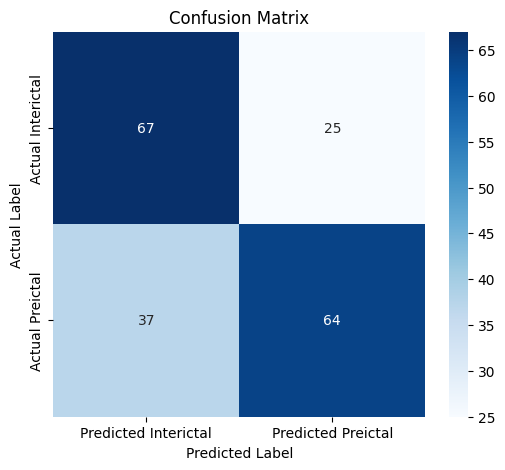


--- ROC Curve ---


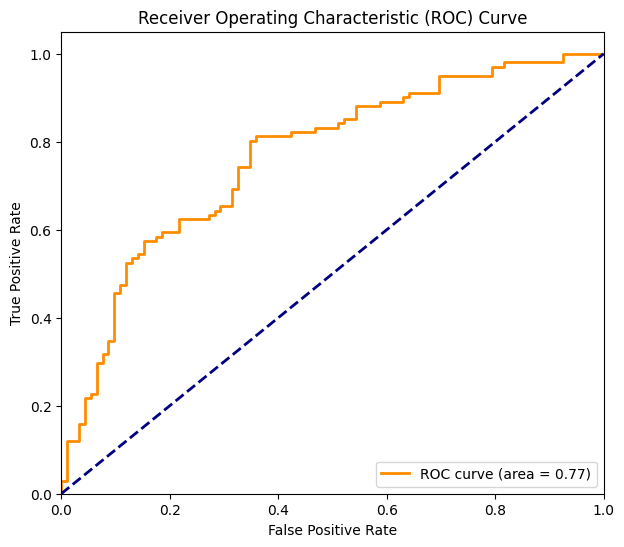


Model evaluation complete!


In [60]:
# Cell 10: Evaluate the Model on the Test Set

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

print("Evaluating model on the test set...")

# Evaluate the model on the test data
# verbose=0: Suppress progress bar during evaluation
test_loss, test_accuracy, test_precision, test_recall, test_auc = model.evaluate(X_test, y_test, verbose=0)

print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# Predict probabilities on the test set
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int) # Convert probabilities to binary predictions (0 or 1)

# --- Detailed Classification Report ---
print("\n--- Detailed Classification Report ---")
print(classification_report(y_test, y_pred, target_names=['Interictal (0)', 'Preictal (1)']))

# --- Confusion Matrix ---
print("\n--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Interictal', 'Predicted Preictal'],
            yticklabels=['Actual Interictal', 'Actual Preictal'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# --- ROC Curve ---
print("\n--- ROC Curve ---")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("\nModel evaluation complete!")

Plotting training history plots...


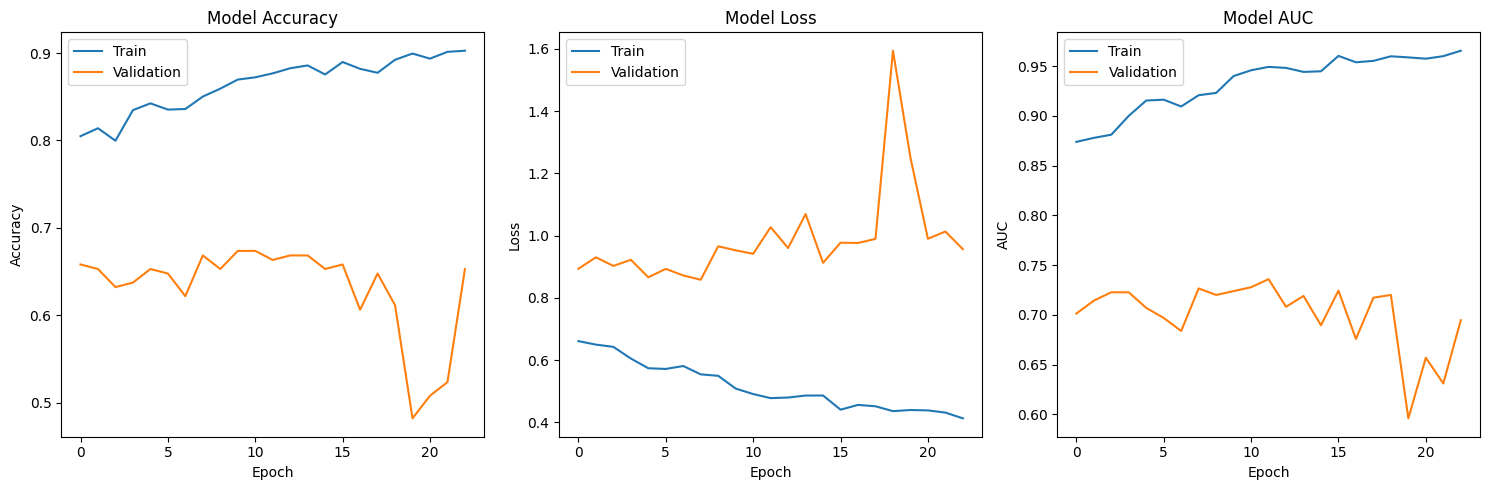

Training history plots generated!


In [61]:
# Cell 11: Plotting Training History

import matplotlib.pyplot as plt

print("Plotting training history plots...")

# Get the history data
hist = history.history

# Create plots
plt.figure(figsize=(15, 5))

# Plot Accuracy
plt.subplot(1, 3, 1)
plt.plot(hist['accuracy'], label='Train')
plt.plot(hist['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 3, 2)
plt.plot(hist['loss'], label='Train')
plt.plot(hist['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot AUC
plt.subplot(1, 3, 3)
plt.plot(hist['auc'], label='Train')
plt.plot(hist['val_auc'], label='Validation')
plt.title('Model AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()

plt.tight_layout()
plt.show()

print("Training history plots generated!")